In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
agente1 = pd.read_csv('../results/16x16/exp_agent1.txt', sep = ";")
agente2_1 = pd.read_csv('../results/16x16/exp_agent2-1.txt', sep = ";")
agente2_2 = pd.read_csv('../results/16x16/exp_agent2-2.txt', sep = ";")
agente3_1 = pd.read_csv('../results/16x16/exp_agent3-1.txt', sep = ";")
agente3_2 = pd.read_csv('../results/16x16/exp_agent3-2.txt', sep = ";")
agente3_3 = pd.read_csv('../results/16x16/exp_agent3-3.txt', sep = ";")
agente3_4 = pd.read_csv('../results/16x16/exp_agent3-4.txt', sep = ";")
agente3_1b = pd.read_csv('../results/16x16/exp_agent3-1b.txt', sep = ";")
agente3_2b = pd.read_csv('../results/16x16/exp_agent3-2b.txt', sep = ";")
agente3_3b = pd.read_csv('../results/16x16/exp_agent3-3b.txt', sep = ";")
agente3_4b = pd.read_csv('../results/16x16/exp_agent3-4b.txt', sep = ";")

In [3]:
agente1['goal'] = np.where(agente1['next_state'] == 'i_gl', 1, 0)
agente2_1['goal'] = np.where(agente2_1['next_state'] == 'i_gl', 1, 0)
agente2_2['goal'] = np.where(agente2_2['next_state'] == 'i_gl', 1, 0)
agente3_1['goal'] = np.where(agente3_1['next_state'] == 'i_gl', 1, 0)
agente3_2['goal'] = np.where(agente3_2['next_state'] == 'i_gl', 1, 0)
agente3_3['goal'] = np.where(agente3_3['next_state'] == 'i_gl', 1, 0)
agente3_4['goal'] = np.where(agente3_4['next_state'] == 'i_gl', 1, 0)
agente3_1b['goal'] = np.where(agente3_1b['next_state'] == 'i_gl', 1, 0)
agente3_2b['goal'] = np.where(agente3_2b['next_state'] == 'i_gl', 1, 0)
agente3_3b['goal'] = np.where(agente3_3b['next_state'] == 'i_gl', 1, 0)
agente3_4b['goal'] = np.where(agente3_4b['next_state'] == 'i_gl', 1, 0)

In [4]:
agente2_1.head()

,env,config,exp,energy,current,next_state,next_move,goal
0,16x16,exp_agent2-1,0,200,i_ini,i_vz,1,0
0,16x16,exp_agent2-1,0,199,i_vz,i_ini,3,0
0,16x16,exp_agent2-1,0,198,i_ini,i_vz,2,0
0,16x16,exp_agent2-1,0,197,i_vz,i_vz,2,0
0,16x16,exp_agent2-1,0,196,i_vz,i_vz,2,0


In [5]:
agente3_4['next_state'].unique()

array(['i_vz', 'i_ini', 'i_b', 'i_s', 'i_bfs', 'i_gl', 'i_f', 'i_bs',
       'i_bf'], dtype=object)

In [6]:
agente = ['dummy', 'covarde-1', 'covarde-2', 'visao-1a',
          'visao-1b', 'visao-2a', 'visao-2b', 'visao-3a',
          'visao-3b', 'visao-4a', 'visao-4b']

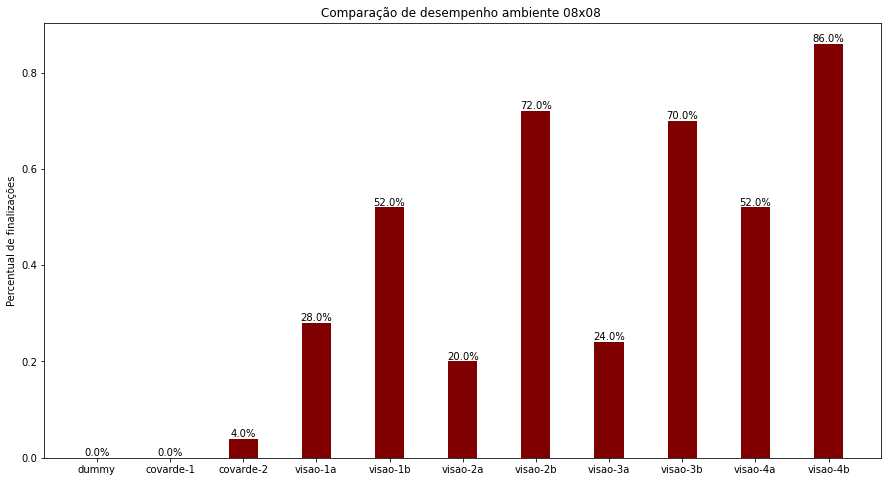

In [7]:
fig = plt.figure(figsize = (15, 8))

values = [
    round(agente1['goal'].sum()/50, 3),
    round(agente2_1['goal'].sum()/50, 3),
    round(agente2_2['goal'].sum()/50, 3),
    round(agente3_1['goal'].sum()/50, 3),
    round(agente3_1b['goal'].sum()/50, 3),
    round(agente3_2['goal'].sum()/50, 3),
    round(agente3_2b['goal'].sum()/50, 3),
    round(agente3_3['goal'].sum()/50, 3),
    round(agente3_3b['goal'].sum()/50, 3),
    round(agente3_4['goal'].sum()/50, 3),
    round(agente3_4b['goal'].sum()/50, 3)
]

# creating the bar plot
plt.bar(agente,values, color ='maroon',width = 0.4)
 
#plt.xlabel("Label agente")
plt.ylabel("Percentual de finalizações")
plt.title("Comparação de desempenho ambiente 08x08 ")

n = range(len(values))
for i in range(len(values)):
    plt.annotate(str(round(values[i]*100, 2)) + '%', xy=(n[i],values[i]), ha='center', va='bottom')

plt.show()

In [10]:
energy = 200
values = [
    (energy-agente1[agente1['goal']==1]['energy']),
    (energy-agente2_1[agente2_1['goal']==1]['energy']),
    (energy-agente2_2[agente2_2['goal']==1]['energy']),
    (energy-agente3_1[agente3_1['goal']==1]['energy']),
    (energy-agente3_1b[agente3_1b['goal']==1]['energy']),
    (energy-agente3_2[agente3_2['goal']==1]['energy']),
    (energy-agente3_2b[agente3_2b['goal']==1]['energy']),
    (energy-agente3_3[agente3_3['goal']==1]['energy']),
    (energy-agente3_3b[agente3_3b['goal']==1]['energy']),
    (energy-agente3_4[agente3_4['goal']==1]['energy']),
    (energy-agente3_4b[agente3_4b['goal']==1]['energy'])
]

In [11]:
df = pd.DataFrame(values[0].describe()).reset_index()\
    .rename(columns = {"energy": agente[0]})

for i in range(1,len(values)):
    tmp = pd.DataFrame(values[i].describe()).reset_index()\
    .drop("index", axis = 1)\
    .rename(columns = {"energy": agente[i]})
    
    df = pd.concat([df, tmp], axis = 1)

df

,index,dummy,covarde-1,covarde-2,visao-1a,visao-1b,visao-2a,visao-2b,visao-3a,visao-3b,visao-4a,visao-4b
0,count,0.0,0.0,2.000000,14.000000,26.000000,10.000000,36.000000,12.00000,35.000000,26.000000,43.000000
1,mean,NaN,NaN,169.000000,114.000000,104.923077,100.600000,102.611111,113.50000,91.914286,103.153846,79.093023
2,std,NaN,NaN,36.769553,44.471253,38.738016,38.836409,47.120076,54.30637,52.724239,45.938822,53.062324
3,min,NaN,NaN,143.000000,31.000000,43.000000,53.000000,27.000000,33.00000,15.000000,25.000000,17.000000
4,25%,NaN,NaN,156.000000,84.500000,80.000000,69.500000,62.500000,72.50000,52.000000,70.000000,39.000000
5,50%,NaN,NaN,169.000000,120.000000,94.000000,101.000000,99.000000,102.00000,71.000000,98.000000,63.000000
6,75%,NaN,NaN,182.000000,146.000000,132.000000,114.500000,140.000000,168.00000,137.000000,131.000000,112.000000
7,max,NaN,NaN,195.000000,183.000000,187.000000,171.000000,187.000000,197.00000,189.000000,193.000000,197.000000


In [12]:
df.to_clipboard(excel=True, decimal = ",")

In [13]:
ag = [agente3_1, agente3_1b, agente3_2, agente3_2b, agente3_3, agente3_3b, agente3_4, agente3_4b]
agente_ = ['visao-1a','visao-1b', 'visao-2a', 'visao-2b', 
           'visao-3a','visao-3b', 'visao-4a', 'visao-4b']

In [16]:
df = pd.DataFrame(columns = ['agente', '%fail', '%goal'])

for i in range(len(ag)):
    lst = list(set(ag[i]['exp'].unique()) - set(list(ag[i][ag[i]['goal']==1]['exp'])))
    fail = ag[i][(ag[i]['exp'].isin(lst)) & (ag[i]['next_state'] == 'i_vz')].groupby('exp').count()['env'].mean()
    goal = ag[i][(~ag[i]['exp'].isin(lst)) & (ag[i]['next_state'] == 'i_vz')].groupby('exp').count()['env'].mean()
    row_df = pd.DataFrame([[agente_[i], fail/energy, goal/energy]], columns = ['agente', '%fail', '%goal'])
    df = pd.concat([row_df, df], ignore_index=True)

In [17]:
df['dif'] = df['%fail'] - df['%goal']
df = df.fillna(0)
df[df['%fail'] != 0].to_clipboard(excel=True, decimal = ",")

In [18]:
df[df['%fail'] != 0]['dif'].mean()

0.41741283835800747

In [14]:
for m in ag:
    lst = list(set(m['exp'].unique()) - set(list(m[m['goal']==1]['exp'])))
    print("mente xxx")
    for i in range(4):
        print('goal: ', m[~(m['exp'].isin(lst)) & (m['next_move'] == i)].groupby(['exp']).count()['env'].mean(),
             'fail: ', m[(m['exp'].isin(lst)) & (m['next_move'] == i)].groupby(['exp']).count()['env'].mean())

mente xxx
goal:  14.0 fail:  7.244897959183674
goal:  16.0 fail:  7.775510204081633
goal:  11.0 fail:  7.586956521739131
goal:  17.0 fail:  7.760869565217392
mente xxx
goal:  12.5 fail:  14.0625
goal:  8.5 fail:  15.416666666666666
goal:  9.5 fail:  17.479166666666668
goal:  9.0 fail:  17.958333333333332
mente xxx
goal:  nan fail:  14.44
goal:  nan fail:  14.98
goal:  nan fail:  17.94
goal:  nan fail:  17.64
mente xxx
goal:  11.153846153846153 fail:  16.541666666666668
goal:  8.961538461538462 fail:  17.333333333333332
goal:  6.4 fail:  15.541666666666666
goal:  6.458333333333333 fail:  15.583333333333334
mente xxx
goal:  11.416666666666666 fail:  15.714285714285714
goal:  9.61111111111111 fail:  17.5
goal:  6.794117647058823 fail:  15.285714285714286
goal:  6.8 fail:  16.5
mente xxx
goal:  10.590909090909092 fail:  19.333333333333332
goal:  9.136363636363637 fail:  13.833333333333334
goal:  6.15 fail:  18.333333333333332
goal:  6.923076923076923 fail:  13.5
mente xxx
goal:  9.08333333